<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r2_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-normal-n-0-6-9-15-r2.csv?token=AKVFSOAE7U65U4ACBE5BRTK64H6A4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-malicious-n-0-6-9-15-m-1-11-r2.csv?token=AKVFSOBKGNME4PQDKC2PZWS64H6BA')

In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,10,1,10,10,8,8,3,27,0
1,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,9,2,10,18,8,4,3,30,0
2,15,2,4,1,1,4,3,9,0,0,23,7,1,4,2,0.500000,12,6,1,6,6,8,4,3,27,1
3,262,1,4,1,1,4,3,9,1,1,22,6,16,2,1,0.500000,8,8,3,10,24,4,64,3,27,0
4,262,1,4,1,1,4,3,9,0,0,22,6,12,3,2,0.666667,12,5,2,6,10,4,48,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128610,3278903,4,0,6,4,2,3,12,18,2,20,4,60215,3,0,0.000000,25,5,11,15,55,0,2890320,18,216,0
128611,3278910,4,0,6,5,3,3,12,18,2,20,4,60215,3,0,0.000000,32,4,12,15,48,0,5419350,18,216,0
128612,3278911,4,0,2,1,4,3,9,18,2,20,4,60216,3,0,0.000000,32,3,13,15,39,0,481728,6,54,0
128613,3278912,2,0,7,1,4,3,10,18,2,15,15,60215,4,0,0.000000,6,2,14,15,28,0,1686020,21,210,0


In [6]:
df.shape

(128615, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-malicious-n-0-6-9-15-m-1-12-r2.csv?token=AKVFSOFEQ5GDY4WA54K55EK64H6BE')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-malicious-n-0-6-9-15-m-1-7-r2.csv?token=AKVFSOGP7ZM3CRJGVZJ65KS64H6BK')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-malicious-n-0-6-9-15-m-11-12-r2.csv?token=AKVFSOHDUCR2QDO2TC7WA5264H6BQ')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-malicious-n-0-6-9-15-m-7-11-r2.csv?token=AKVFSOEWGKQ3QQ6MYOHPL4264H6BU')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r2/4-fft-malicious-n-0-6-9-15-m-7-12-r2.csv?token=AKVFSOC322DAT7QDRMUHR2S64H6B2')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(80081, 26)
(79838, 26)
(66318, 26)
(66314, 26)
(66333, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.389582,0.300130,0.038098,-0.055089,NaN,0.327071,-0.042434,0.264556,-0.720175,-0.862510,-0.182232,-0.076643,0.062272,-0.010612,-0.003968,0.347403,0.066017,0.300130,0.366806,0.015734
inport,-0.389582,1.000000,-0.169595,0.037436,-0.054131,NaN,-0.438543,0.064555,0.263958,0.364295,0.292623,0.152589,-0.097644,-0.141529,-0.176616,-0.158869,0.588021,-0.003473,-0.169595,-0.286730,-0.062080
cache_coherence_type,0.300130,-0.169595,1.000000,0.325917,-0.471269,NaN,-0.063491,-0.007507,0.003705,-0.292776,-0.300776,-0.508665,0.001809,-0.016940,-0.011174,-0.003974,0.048530,0.284788,1.000000,0.958849,0.017915
flit_id,0.038098,0.037436,0.325917,1.000000,-0.125773,NaN,-0.187353,0.018773,0.039948,-0.005932,-0.010021,0.529771,0.004784,0.006237,0.008138,0.008032,0.038078,0.653781,0.325917,0.266347,-0.007170
flit_type,-0.055089,-0.054131,-0.471269,-0.125773,1.000000,NaN,0.270908,-0.027146,-0.057764,0.008578,0.014491,0.421255,-0.078571,0.063807,-0.010902,-0.006879,-0.055060,0.046237,-0.471269,-0.385131,0.010368
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.327071,-0.438543,-0.063491,-0.187353,0.270908,NaN,1.000000,-0.012490,-0.165188,-0.428555,-0.387459,-0.046643,0.034549,0.122492,0.115965,0.105697,-0.298669,-0.070574,-0.063491,0.214001,-0.011709
traversal_id,-0.042434,0.064555,-0.007507,0.018773,-0.027146,NaN,-0.012490,1.000000,0.015189,0.000675,-0.006271,0.021951,0.073196,0.073942,0.108653,0.052592,0.009280,0.555953,-0.007507,-0.011725,-0.287105
hop_count,0.264556,0.263958,0.003705,0.039948,-0.057764,NaN,-0.165188,0.015189,1.000000,0.214723,-0.324321,0.119128,-0.135658,-0.075694,-0.156071,-0.132099,0.565033,0.022459,0.003705,-0.050085,0.064944
current_hop,-0.720175,0.364295,-0.292776,-0.005932,0.008578,NaN,-0.428555,0.000675,0.214723,1.000000,0.809097,0.311507,0.023189,-0.079019,-0.041227,-0.037259,0.021649,-0.071810,-0.292776,-0.391790,0.072917


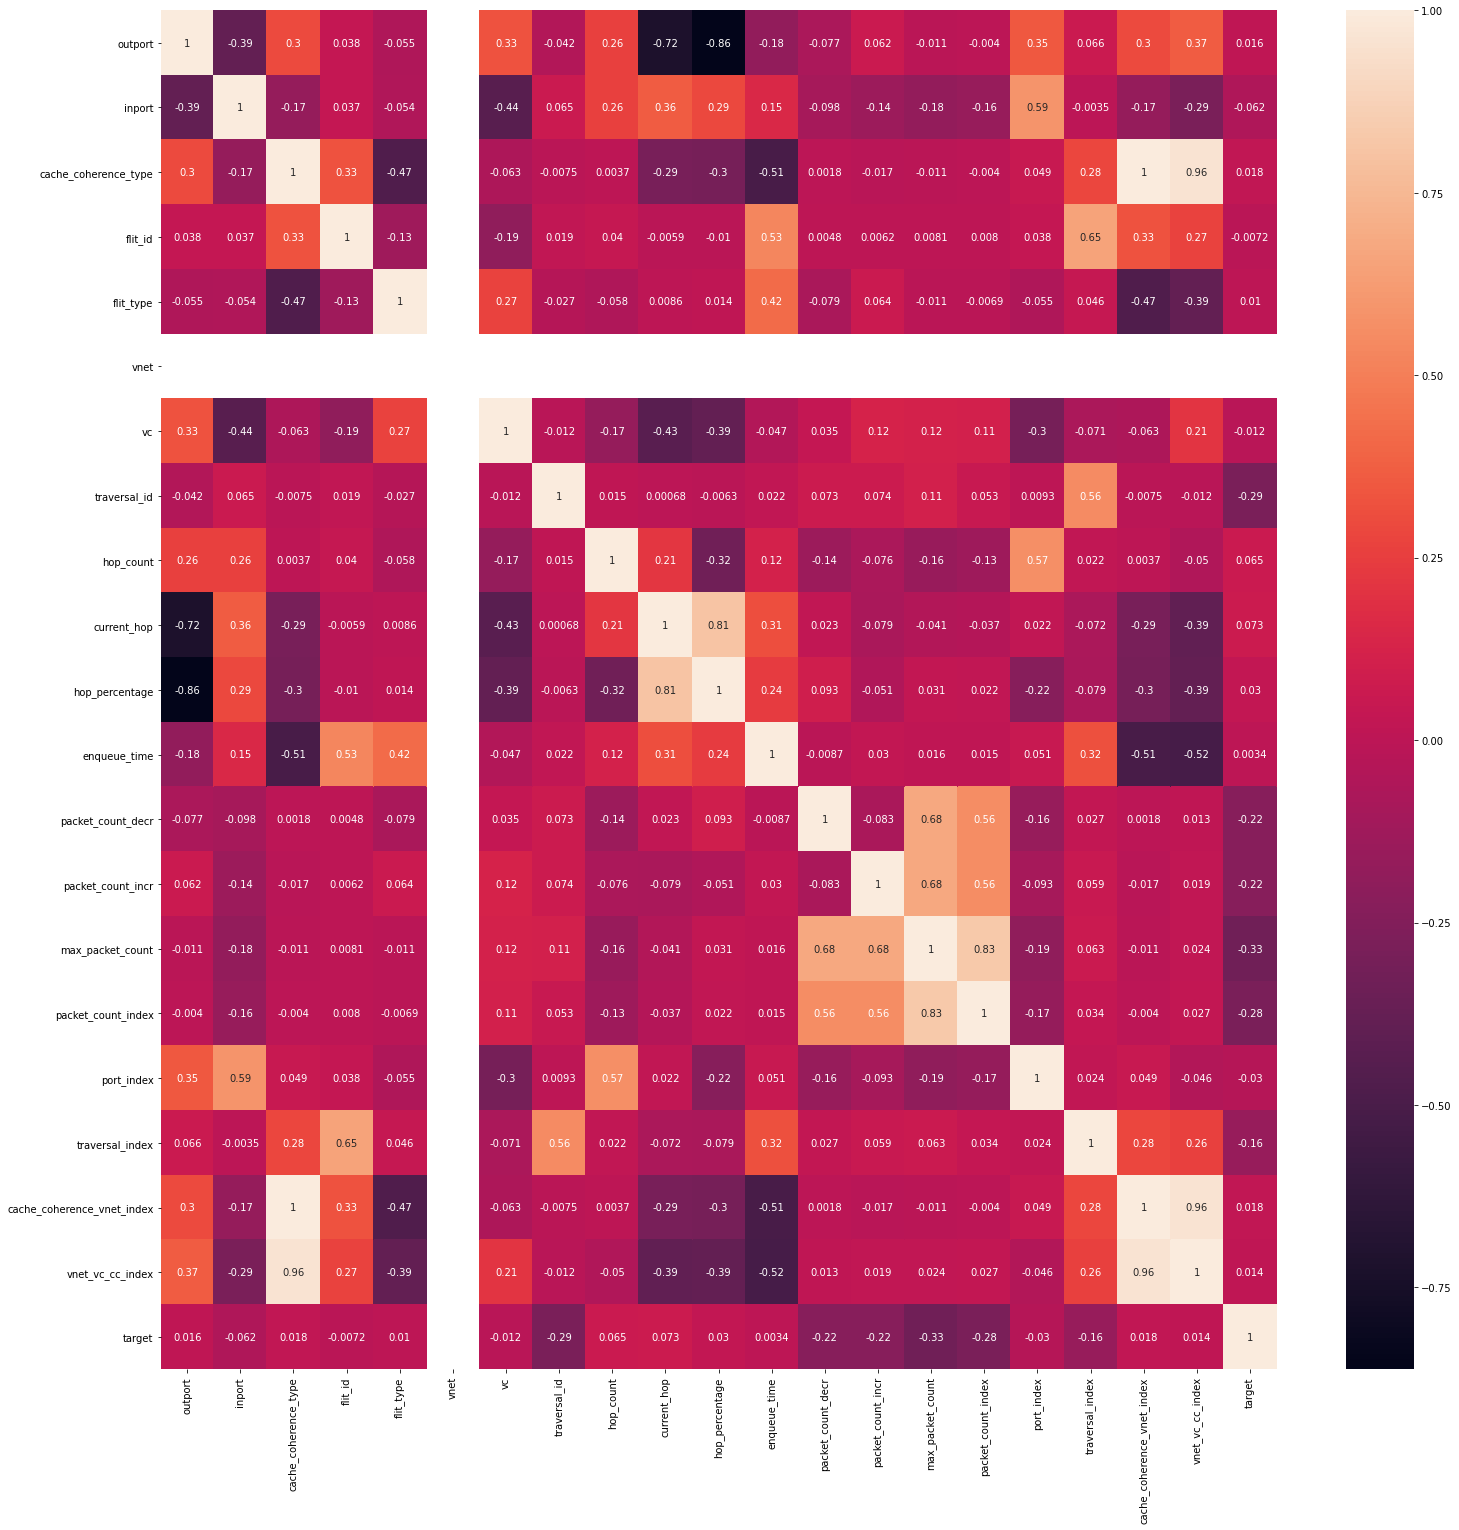

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

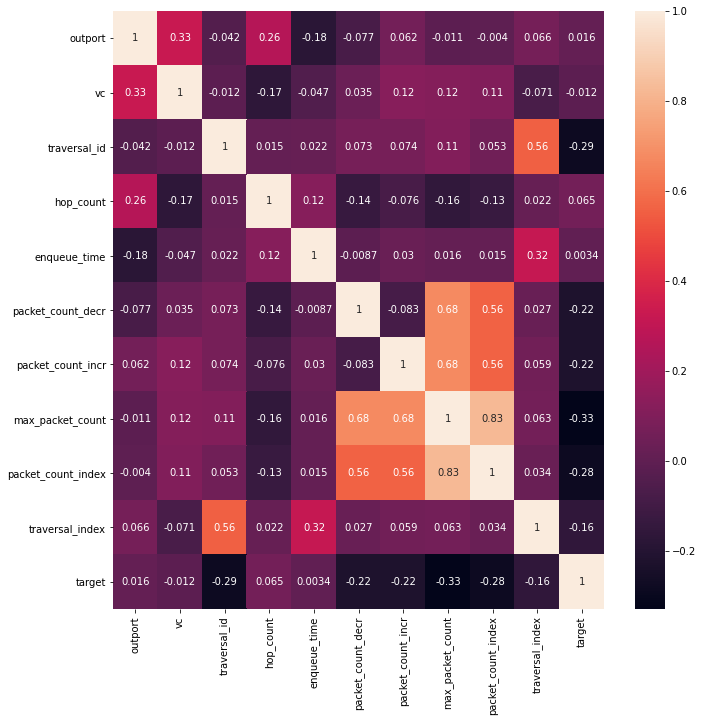

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

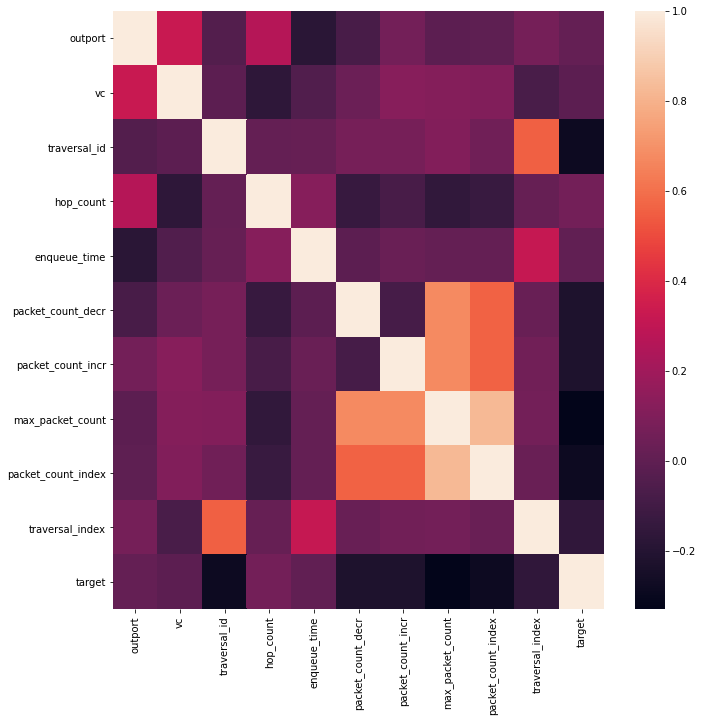

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000017,0.4,0.066667,0.054878,0.000000,0.054878,0.001307,7.380964e-07
1,0.50,0.333333,0.000000,0.6,0.133333,0.048780,0.006098,0.054878,0.002468,0.000000e+00
2,0.50,0.000000,0.000000,0.6,0.133333,0.030488,0.000000,0.030488,0.000726,0.000000e+00
3,0.25,0.000000,0.000249,0.2,0.066667,0.042683,0.012195,0.054878,0.003339,1.107145e-05
4,0.25,0.000000,0.000183,0.4,0.133333,0.024390,0.006098,0.030488,0.001307,8.119061e-06
...,...,...,...,...,...,...,...,...,...,...
128610,1.00,1.000000,0.999983,0.4,0.350000,0.024390,0.060976,0.085366,0.007840,5.333330e-01
128611,1.00,1.000000,0.999983,0.4,0.466667,0.018293,0.067073,0.085366,0.006823,1.000000e+00
128612,1.00,0.000000,1.000000,0.4,0.466667,0.012195,0.073171,0.085366,0.005517,8.888969e-02
128613,0.50,0.333333,0.999983,0.6,0.033333,0.006098,0.079268,0.085366,0.003920,3.111106e-01


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000017,0.4,0.066667,0.052083,0.000000,0.052083,0.001063,7.377411e-07
1,0.50,0.333333,0.000000,0.6,0.133333,0.046875,0.005208,0.052083,0.002020,0.000000e+00
2,0.25,0.000000,0.000232,0.2,0.066667,0.041667,0.010417,0.052083,0.002764,1.032838e-05
3,0.25,0.000000,0.000266,0.4,0.133333,0.036458,0.015625,0.052083,0.003295,1.180386e-05
4,0.50,0.000000,0.000332,0.4,0.066667,0.031250,0.020833,0.052083,0.003614,1.475482e-05
...,...,...,...,...,...,...,...,...,...,...
80076,1.00,1.000000,0.999983,0.4,0.350000,0.020833,0.052083,0.072917,0.005740,5.333330e-01
80077,1.00,1.000000,0.999983,0.4,0.466667,0.015625,0.057292,0.072917,0.004996,1.000000e+00
80078,1.00,0.000000,1.000000,0.4,0.466667,0.010417,0.062500,0.072917,0.004039,8.888969e-02
80079,0.50,0.333333,0.999983,0.6,0.033333,0.005208,0.067708,0.072917,0.002870,3.111106e-01


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    79822
1    48793
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1267.608634
7    max_packet_count  1210.845775
8  packet_count_index  1180.703986
6   packet_count_incr   611.305654
5   packet_count_decr   599.573021
9     traversal_index   416.194127
3           hop_count    35.488120
0             outport     6.154230
1                  vc     4.780010
4        enqueue_time     0.092009


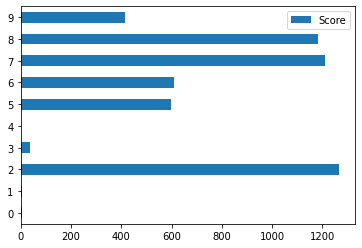

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.92192359467113
Test Prediction Score 97.70515750536013


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 78.46555362695271
Test Prediction Score 81.67789774292943
Test Prediction Score 75.06710093790524
Test Prediction Score 75.79394999547607
Test Prediction Score 78.53557053050518


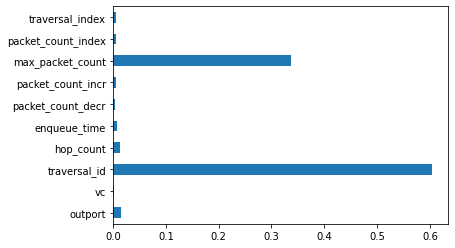

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

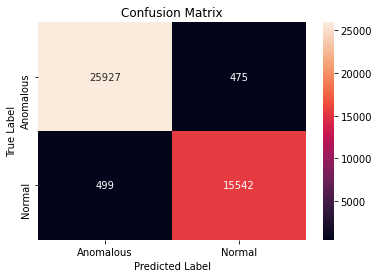

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     26402
           1       0.97      0.97      0.97     16041

    accuracy                           0.98     42443
   macro avg       0.98      0.98      0.98     42443
weighted avg       0.98      0.98      0.98     42443



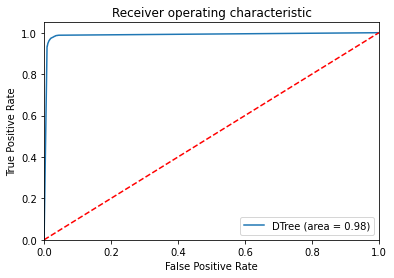

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r2l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.5499846853427


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 81.09913712366229
Test Prediction Score 84.78168290788848
Test Prediction Score 77.30480412557677
Test Prediction Score 78.57164399674276
Test Prediction Score 79.71296338172553


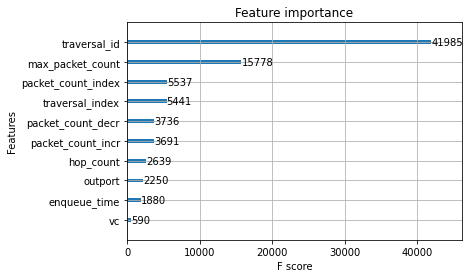

In [47]:
plot_importance(xgbc)
plt.show()

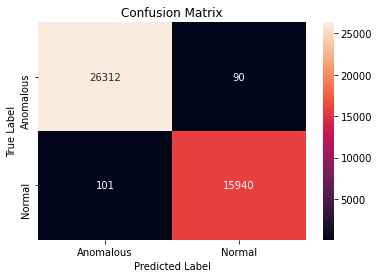

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26402
           1       0.99      0.99      0.99     16041

    accuracy                           1.00     42443
   macro avg       1.00      1.00      1.00     42443
weighted avg       1.00      1.00      1.00     42443



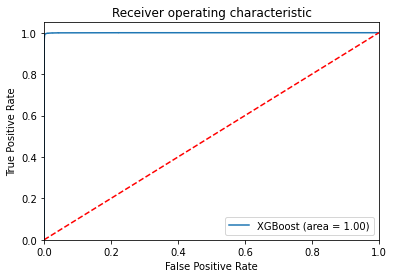

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()